# Prepare MSG SEVIRI observations for NWCSAF application

I also try to use as much tools for `nawdex_analysis` package as possible!

In [9]:
%matplotlib inline

import numpy as np
import pylab as pl
import xarray as xr
import datetime

In [19]:
import nawdex_analysis.io.reproj
import nawdex_analysis.io.input_obs as iobs

from tropy.standard_config import local_data_path

## Set SEVIRI region for Tropical Atlantic

In [6]:
SEVIRI_region = ((1250, 2150), (250, 2300))
NWCSAF_region = nawdex_analysis.io.reproj.slice2nwcsaf_region( SEVIRI_region )

In [7]:
# overwrite settings in input module
iobs.SEVIRI_cutout = SEVIRI_region
iobs.NWCSAF_region = NWCSAF_region

## Set Date

In [ ]:
date = '20131220'
t = datetime.datetime.strptime( date, '%Y%m%d')

## Test Input

In [11]:
d = iobs.read_msevi(t, t)

... reading  /tmp/hrit4344679289/H-000-MSG3__-MSG3________-WV_062___-000004___-201312200000-__
... reading  /tmp/hrit4344679289/H-000-MSG3__-MSG3________-WV_062___-000005___-201312200000-__
... reading  /tmp/hrit4344679289/H-000-MSG3__-MSG3________-WV_062___-000006___-201312200000-__
... reading  /tmp/hrit4344679289/H-000-MSG3__-MSG3________-WV_073___-000004___-201312200000-__
... reading  /tmp/hrit4344679289/H-000-MSG3__-MSG3________-WV_073___-000005___-201312200000-__
... reading  /tmp/hrit4344679289/H-000-MSG3__-MSG3________-WV_073___-000006___-201312200000-__
... reading  /tmp/hrit4344679289/H-000-MSG3__-MSG3________-IR_039___-000004___-201312200000-__
... reading  /tmp/hrit4344679289/H-000-MSG3__-MSG3________-IR_039___-000005___-201312200000-__
... reading  /tmp/hrit4344679289/H-000-MSG3__-MSG3________-IR_039___-000006___-201312200000-__
... reading  /tmp/hrit4344679289/H-000-MSG3__-MSG3________-IR_108___-000004___-201312200000-__
... reading  /tmp/hrit4344679289/H-000-MSG3__-MSG3

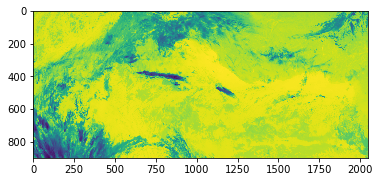

In [14]:
pl.imshow( d['IR_108'][0] )

## Do the full IO

In [16]:
# from output_obs module
from nawdex_analysis.io.output_obs import save_meteosat_bt2nc

def save_meteosat_tstack( date, outname = None ):    

    '''
    Saves full time stack of daily Meteosat BT data to netcdf file
    for nawdex region.

    
    Parameters
    ----------
    date : str
        date string as %Y%m%d

    outname : str, optional, default = None
        output file name, if None a local dir on altair is chosen


    Returns
    -------
    None
    '''

    t = datetime.datetime.strptime( date, '%Y%m%d')
    t2 = t + datetime.timedelta( hours = 23 )


    d = iobs.read_msevi(t, t2)
   
    if outname is None:
        outname = '%s/icon/nawdex/meteosat/msevi-nawdex-%s.nc' % (local_data_path,
                                                            date)
    save_meteosat_bt2nc( outname, d)

    return


In [21]:
oname = '%s/icon/hdcp2_atlantic_stochconv/msevi-hdcp2_atlantic-%s.nc' % (local_data_path,
                                                            date)

save_meteosat_tstack( date, outname = oname )

... reading  /tmp/hrit914204212/H-000-MSG3__-MSG3________-WV_062___-000004___-201312200000-__
... reading  /tmp/hrit914204212/H-000-MSG3__-MSG3________-WV_062___-000005___-201312200000-__
... reading  /tmp/hrit914204212/H-000-MSG3__-MSG3________-WV_062___-000006___-201312200000-__
... reading  /tmp/hrit914204212/H-000-MSG3__-MSG3________-WV_073___-000004___-201312200000-__
... reading  /tmp/hrit914204212/H-000-MSG3__-MSG3________-WV_073___-000005___-201312200000-__
... reading  /tmp/hrit914204212/H-000-MSG3__-MSG3________-WV_073___-000006___-201312200000-__
... reading  /tmp/hrit914204212/H-000-MSG3__-MSG3________-IR_039___-000004___-201312200000-__
... reading  /tmp/hrit914204212/H-000-MSG3__-MSG3________-IR_039___-000005___-201312200000-__
... reading  /tmp/hrit914204212/H-000-MSG3__-MSG3________-IR_039___-000006___-201312200000-__
... reading  /tmp/hrit914204212/H-000-MSG3__-MSG3________-IR_108___-000004___-201312200000-__
... reading  /tmp/hrit914204212/H-000-MSG3__-MSG3________-IR

... reading  /tmp/hrit5426302840/H-000-MSG3__-MSG3________-IR_097___-000005___-201312200300-__
... reading  /tmp/hrit5426302840/H-000-MSG3__-MSG3________-IR_097___-000006___-201312200300-__
... reading  /tmp/hrit5426302840/H-000-MSG3__-MSG3________-IR_120___-000004___-201312200300-__
... reading  /tmp/hrit5426302840/H-000-MSG3__-MSG3________-IR_120___-000005___-201312200300-__
... reading  /tmp/hrit5426302840/H-000-MSG3__-MSG3________-IR_120___-000006___-201312200300-__
... reading  /tmp/hrit5426302840/H-000-MSG3__-MSG3________-IR_134___-000004___-201312200300-__
... reading  /tmp/hrit5426302840/H-000-MSG3__-MSG3________-IR_134___-000005___-201312200300-__
... reading  /tmp/hrit5426302840/H-000-MSG3__-MSG3________-IR_134___-000006___-201312200300-__

Combine segments

Do calibration
... reading  /tmp/hrit7949138119/H-000-MSG3__-MSG3________-WV_062___-000004___-201312200400-__
... reading  /tmp/hrit7949138119/H-000-MSG3__-MSG3________-WV_062___-000005___-201312200400-__
... reading  /tm

... reading  /tmp/hrit8844301757/H-000-MSG3__-MSG3________-WV_073___-000006___-201312200700-__
... reading  /tmp/hrit8844301757/H-000-MSG3__-MSG3________-IR_039___-000004___-201312200700-__
... reading  /tmp/hrit8844301757/H-000-MSG3__-MSG3________-IR_039___-000005___-201312200700-__
... reading  /tmp/hrit8844301757/H-000-MSG3__-MSG3________-IR_039___-000006___-201312200700-__
... reading  /tmp/hrit8844301757/H-000-MSG3__-MSG3________-IR_108___-000004___-201312200700-__
... reading  /tmp/hrit8844301757/H-000-MSG3__-MSG3________-IR_108___-000005___-201312200700-__
... reading  /tmp/hrit8844301757/H-000-MSG3__-MSG3________-IR_108___-000006___-201312200700-__
... reading  /tmp/hrit8844301757/H-000-MSG3__-MSG3________-IR_087___-000004___-201312200700-__
... reading  /tmp/hrit8844301757/H-000-MSG3__-MSG3________-IR_087___-000005___-201312200700-__
... reading  /tmp/hrit8844301757/H-000-MSG3__-MSG3________-IR_087___-000006___-201312200700-__
... reading  /tmp/hrit8844301757/H-000-MSG3__-MSG3

... reading  /tmp/hrit9627666323/H-000-MSG3__-MSG3________-IR_120___-000005___-201312201000-__
... reading  /tmp/hrit9627666323/H-000-MSG3__-MSG3________-IR_120___-000006___-201312201000-__
... reading  /tmp/hrit9627666323/H-000-MSG3__-MSG3________-IR_134___-000004___-201312201000-__
... reading  /tmp/hrit9627666323/H-000-MSG3__-MSG3________-IR_134___-000005___-201312201000-__
... reading  /tmp/hrit9627666323/H-000-MSG3__-MSG3________-IR_134___-000006___-201312201000-__

Combine segments

Do calibration
... reading  /tmp/hrit1269166862/H-000-MSG3__-MSG3________-WV_062___-000004___-201312201100-__
... reading  /tmp/hrit1269166862/H-000-MSG3__-MSG3________-WV_062___-000005___-201312201100-__
... reading  /tmp/hrit1269166862/H-000-MSG3__-MSG3________-WV_062___-000006___-201312201100-__
... reading  /tmp/hrit1269166862/H-000-MSG3__-MSG3________-WV_073___-000004___-201312201100-__
... reading  /tmp/hrit1269166862/H-000-MSG3__-MSG3________-WV_073___-000005___-201312201100-__
... reading  /tm

... reading  /tmp/hrit1659456311/H-000-MSG3__-MSG3________-IR_039___-000006___-201312201400-__
... reading  /tmp/hrit1659456311/H-000-MSG3__-MSG3________-IR_108___-000004___-201312201400-__
... reading  /tmp/hrit1659456311/H-000-MSG3__-MSG3________-IR_108___-000005___-201312201400-__
... reading  /tmp/hrit1659456311/H-000-MSG3__-MSG3________-IR_108___-000006___-201312201400-__
... reading  /tmp/hrit1659456311/H-000-MSG3__-MSG3________-IR_087___-000004___-201312201400-__
... reading  /tmp/hrit1659456311/H-000-MSG3__-MSG3________-IR_087___-000005___-201312201400-__
... reading  /tmp/hrit1659456311/H-000-MSG3__-MSG3________-IR_087___-000006___-201312201400-__
... reading  /tmp/hrit1659456311/H-000-MSG3__-MSG3________-IR_097___-000004___-201312201400-__
... reading  /tmp/hrit1659456311/H-000-MSG3__-MSG3________-IR_097___-000005___-201312201400-__
... reading  /tmp/hrit1659456311/H-000-MSG3__-MSG3________-IR_097___-000006___-201312201400-__
... reading  /tmp/hrit1659456311/H-000-MSG3__-MSG3

... reading  /tmp/hrit5175763860/H-000-MSG3__-MSG3________-IR_134___-000005___-201312201700-__
... reading  /tmp/hrit5175763860/H-000-MSG3__-MSG3________-IR_134___-000006___-201312201700-__

Combine segments

Do calibration
... reading  /tmp/hrit544053120/H-000-MSG3__-MSG3________-WV_062___-000004___-201312201800-__
... reading  /tmp/hrit544053120/H-000-MSG3__-MSG3________-WV_062___-000005___-201312201800-__
... reading  /tmp/hrit544053120/H-000-MSG3__-MSG3________-WV_062___-000006___-201312201800-__
... reading  /tmp/hrit544053120/H-000-MSG3__-MSG3________-WV_073___-000004___-201312201800-__
... reading  /tmp/hrit544053120/H-000-MSG3__-MSG3________-WV_073___-000005___-201312201800-__
... reading  /tmp/hrit544053120/H-000-MSG3__-MSG3________-WV_073___-000006___-201312201800-__
... reading  /tmp/hrit544053120/H-000-MSG3__-MSG3________-IR_039___-000004___-201312201800-__
... reading  /tmp/hrit544053120/H-000-MSG3__-MSG3________-IR_039___-000005___-201312201800-__
... reading  /tmp/hrit54

... reading  /tmp/hrit7088124871/H-000-MSG3__-MSG3________-IR_087___-000004___-201312202100-__
... reading  /tmp/hrit7088124871/H-000-MSG3__-MSG3________-IR_087___-000005___-201312202100-__
... reading  /tmp/hrit7088124871/H-000-MSG3__-MSG3________-IR_087___-000006___-201312202100-__
... reading  /tmp/hrit7088124871/H-000-MSG3__-MSG3________-IR_097___-000004___-201312202100-__
... reading  /tmp/hrit7088124871/H-000-MSG3__-MSG3________-IR_097___-000005___-201312202100-__
... reading  /tmp/hrit7088124871/H-000-MSG3__-MSG3________-IR_097___-000006___-201312202100-__
... reading  /tmp/hrit7088124871/H-000-MSG3__-MSG3________-IR_120___-000004___-201312202100-__
... reading  /tmp/hrit7088124871/H-000-MSG3__-MSG3________-IR_120___-000005___-201312202100-__
... reading  /tmp/hrit7088124871/H-000-MSG3__-MSG3________-IR_120___-000006___-201312202100-__
... reading  /tmp/hrit7088124871/H-000-MSG3__-MSG3________-IR_134___-000004___-201312202100-__
... reading  /tmp/hrit7088124871/H-000-MSG3__-MSG3